In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output

In [2]:
df = pd.read_csv('/Users/jacksonsorenson/Documents/Pyhton Projects/Seagate Revenue Optimization/Cleaned CSV/cleaned_supply_chain_data.csv')
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Inspection results,Defect rates,Transportation modes,Routes,Costs,Profit Margin,Stock Coverage,High Defect Rate,Transportation Efficiency,Price Tier
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Pending,0.226410,Road,Route B,187.752075,8474.244717,0.604167,1,553.385988,High
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Pending,4.854068,Road,Route B,503.065579,6957.834486,1.432432,1,553.385988,Low
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Pending,4.580593,Air,Route C,141.920282,9435.829344,0.011364,1,561.712596,Low
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Fail,4.746649,Rail,Route A,254.776159,7512.060266,0.389831,1,541.747556,Medium
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Fail,3.145580,Air,Route A,923.440632,1763.064520,0.089286,1,561.712596,Low


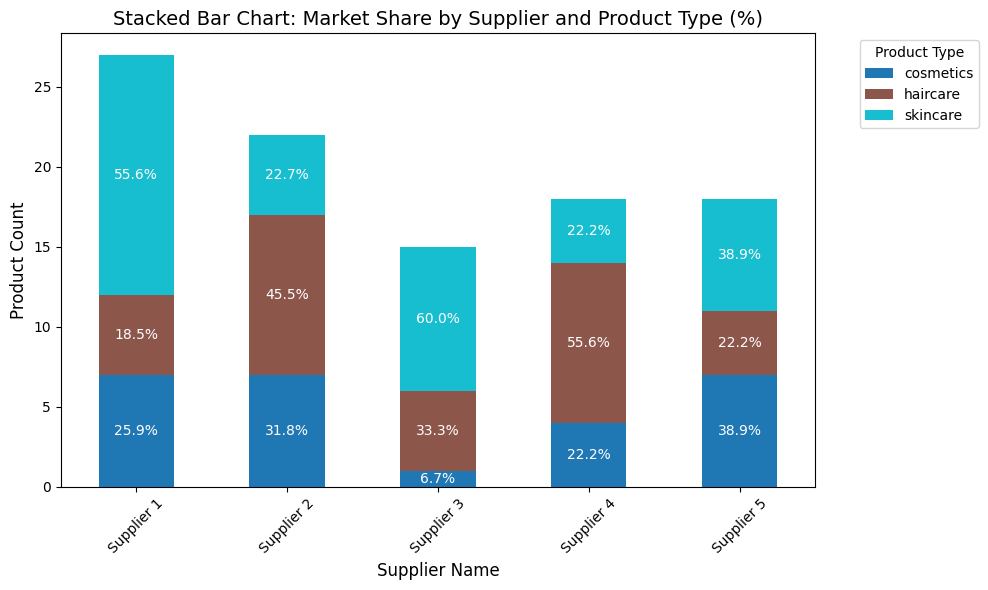

In [3]:
# Percentage of products per supplier


stacked_data_absolute = df.groupby(['Supplier name', 'Product type']).size().unstack(fill_value=0)
stacked_data_percentage = stacked_data_absolute.div(stacked_data_absolute.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(10, 6))
bars = stacked_data_absolute.plot(kind='bar', stacked=True, ax=ax, colormap='tab10')

for i, supplier in enumerate(stacked_data_percentage.index):
    cumulative = 0
    for j, product in enumerate(stacked_data_percentage.columns):
        percentage = stacked_data_percentage.iloc[i, j]
        if percentage > 0:  
            cumulative += stacked_data_absolute.iloc[i, j]
            ax.text(
                i,
                cumulative - stacked_data_absolute.iloc[i, j] / 2,  
                f"{percentage:.1f}%",
                ha='center',
                va='center',
                fontsize=10,
                color='white'
            )

ax.set_title("Stacked Bar Chart: Market Share by Supplier and Product Type (%)", fontsize=14)
ax.set_xlabel("Supplier Name", fontsize=12)
ax.set_ylabel("Product Count", fontsize=12)
ax.legend(title="Product Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


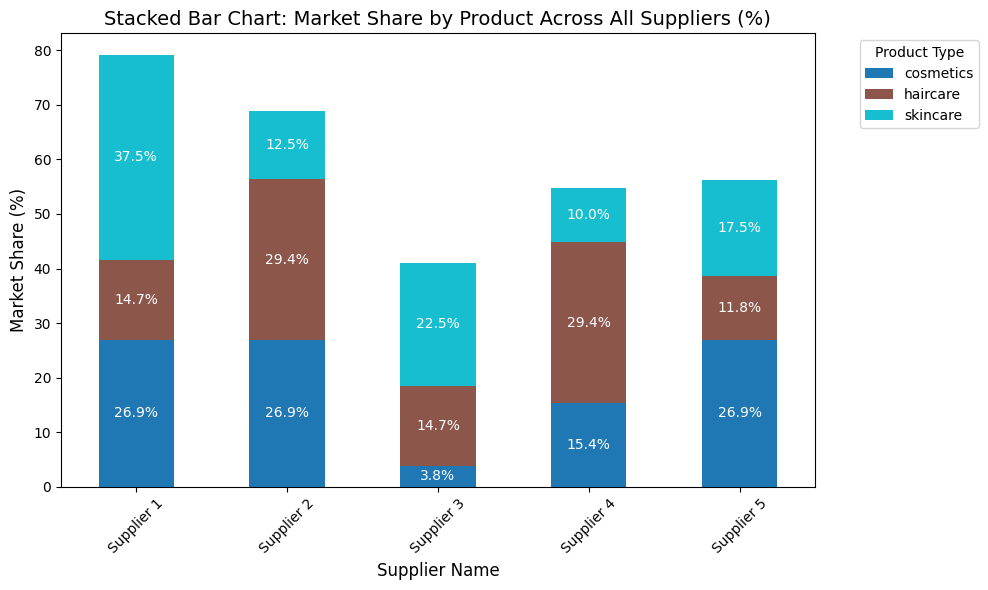

In [4]:
# Finding the supplier product market share between suppliers

# Calculate the total product count for percentages across all suppliers
stacked_data_product_percentage = stacked_data_absolute.div(stacked_data_absolute.sum(axis=0), axis=1) * 100

fig, ax = plt.subplots(figsize=(10, 6))
bars = stacked_data_product_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), ax=ax, colormap='tab10')

# Add percentage text inside each section of the stacked bar
for i, supplier in enumerate(stacked_data_product_percentage.index):
    cumulative = 0
    for j, product in enumerate(stacked_data_product_percentage.columns):
        percentage = stacked_data_product_percentage.iloc[i, j]
        if percentage > 0:  
            cumulative += stacked_data_product_percentage.iloc[i, j]
            ax.text(
                i, 
                cumulative - stacked_data_product_percentage.iloc[i, j] / 2, 
                f"{percentage:.1f}%", 
                ha='center', 
                va='center', 
                fontsize=10, 
                color='white'
            )

ax.set_title("Stacked Bar Chart: Market Share by Product Across All Suppliers (%)", fontsize=14)
ax.set_xlabel("Supplier Name", fontsize=12)
ax.set_ylabel("Market Share (%)", fontsize=12)
ax.legend(title="Product Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


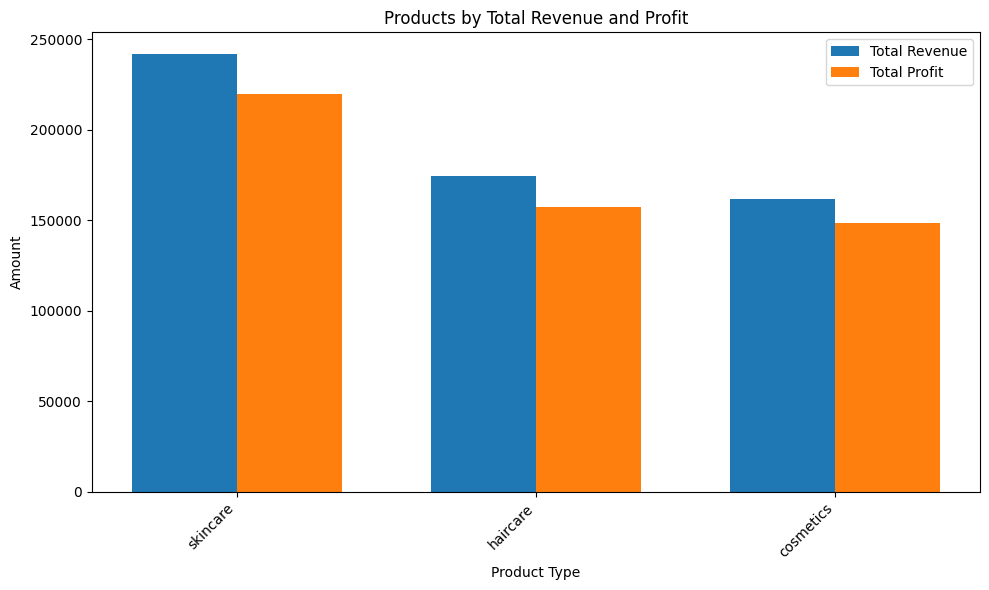

In [5]:
# Total Revenu and Profit per Product

# Calculate total revenue and profit for each product type
df['Profit'] = df['Revenue generated'] - df['Costs']
grouped_data = df.groupby('Product type').agg({
    'Revenue generated': 'sum',
    'Profit': 'sum'
}).reset_index()

# Sort by total revenue to get the top 3 products
top_products = grouped_data.nlargest(3, 'Revenue generated')

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = range(len(top_products))

# Revenue and Profit bars
ax.bar(index, top_products['Revenue generated'], bar_width, label='Total Revenue')
ax.bar([i + bar_width for i in index], top_products['Profit'], bar_width, label='Total Profit')

# Add labels and legend
ax.set_xlabel('Product Type')
ax.set_ylabel('Amount')
ax.set_title('Products by Total Revenue and Profit')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(top_products['Product type'], rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


/var/folders/ty/kkyy7c9s4059czrtyxg_0mz40000gn/T/ipykernel_60151/2831420043.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(supplier_data['Supplier name'], rotation=45, ha='right')


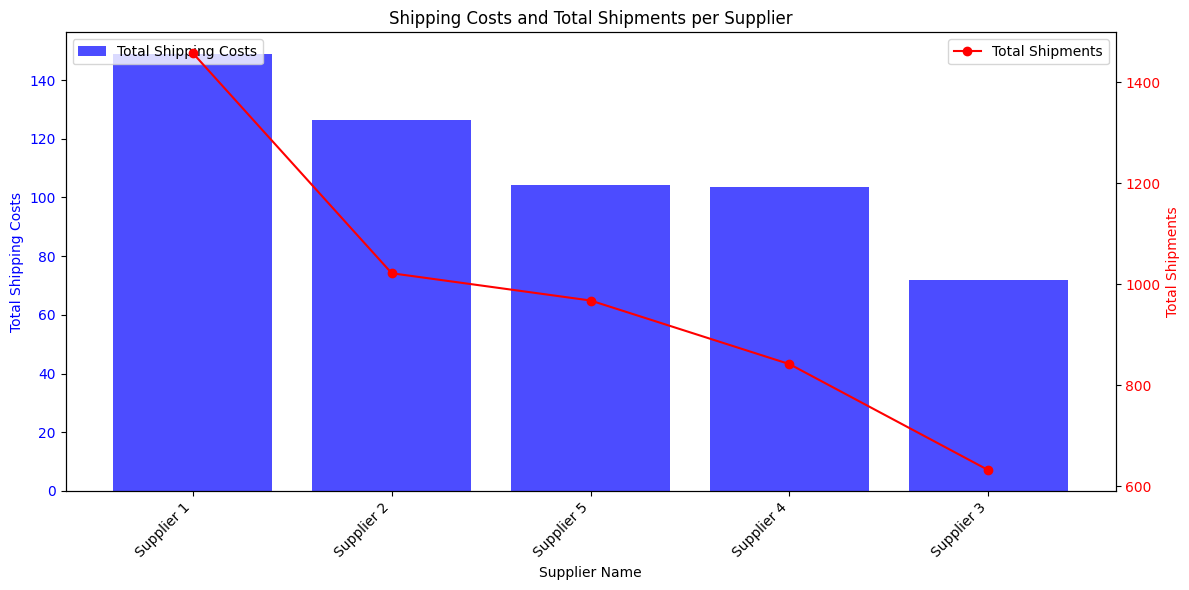

In [6]:
# Total Shipment cost and total shipments per supplier

# Group by supplier to calculate total shipping costs and number of shipments
supplier_data = df.groupby('Supplier name').agg({
    'Shipping costs': 'sum',
    'Order quantities': 'sum'  
}).reset_index()

# Sort by shipping costs
supplier_data = supplier_data.sort_values(by='Shipping costs', ascending=False)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for total shipping costs
ax1.bar(supplier_data['Supplier name'], supplier_data['Shipping costs'], color='b', alpha=0.7, label='Total Shipping Costs')
ax1.set_xlabel('Supplier Name')
ax1.set_ylabel('Total Shipping Costs', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(supplier_data['Supplier name'], rotation=45, ha='right')

# Line plot for number of shipments
ax2 = ax1.twinx()
ax2.plot(supplier_data['Supplier name'], supplier_data['Order quantities'], color='r', marker='o', label='Total Shipments')
ax2.set_ylabel('Total Shipments', color='r')
ax2.tick_params(axis='y', labelcolor='r')


plt.title('Shipping Costs and Total Shipments per Supplier')
fig.tight_layout()

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


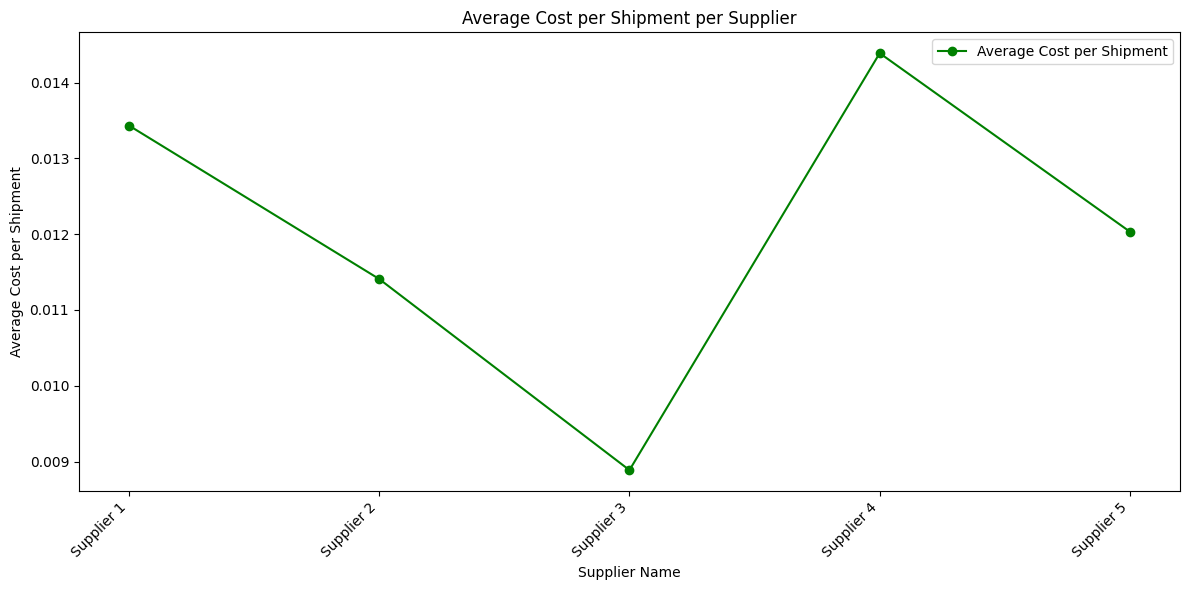

In [7]:
# Avergae cost per shipment per supplier

# Group by supplier to calculate total shipping costs and total shipments
supplier_data = df.groupby('Supplier name').agg({
    'Shipping costs': 'sum',
    'Number of products sold': 'sum'  # Assuming this column represents shipments
}).reset_index()

# Calculate average cost per shipment
supplier_data['Average Cost per Shipment'] = supplier_data['Shipping costs'] / supplier_data['Number of products sold']

# Plot the average cost per shipment per supplier
plt.figure(figsize=(12, 6))
plt.plot(supplier_data['Supplier name'], supplier_data['Average Cost per Shipment'], color='g', marker='o', label='Average Cost per Shipment')

plt.xlabel('Supplier Name')
plt.ylabel('Average Cost per Shipment')
plt.title('Average Cost per Shipment per Supplier')
plt.xticks(rotation=45, ha='right')  
plt.legend()

plt.tight_layout()
plt.show()


In [8]:
# Seeing Main product type, quantity sols, transportation mode, and primary location

# Identify the dominant product, quantity, mode, and primary location for each supplier
dominance_data = df.groupby('Supplier name').agg({
    'Product type': lambda x: x.mode()[0],  
    'Number of products sold': 'sum',  
    'Transportation modes': lambda x: x.mode()[0],  
    'Location': lambda x: x.mode()[0]  
}).reset_index()

# Rename columns for clarity
dominance_data.rename(columns={
    'Product type': 'Dominant Product Type',
    'Number of products sold': 'Total Quantity Sold',
    'Transportation modes': 'Dominant Transportation Mode',
    'Location': 'Primary Location'
}, inplace=True)

print(dominance_data)


  Supplier name Dominant Product Type  Total Quantity Sold  \
0    Supplier 1              skincare                11080   
1    Supplier 2              haircare                11068   
2    Supplier 3              skincare                 8083   
3    Supplier 4              haircare                 7206   
4    Supplier 5             cosmetics                 8662   

  Dominant Transportation Mode Primary Location  
0                          Air          Kolkata  
1                         Rail            Delhi  
2                         Road          Chennai  
3                         Road          Kolkata  
4                         Road          Chennai  


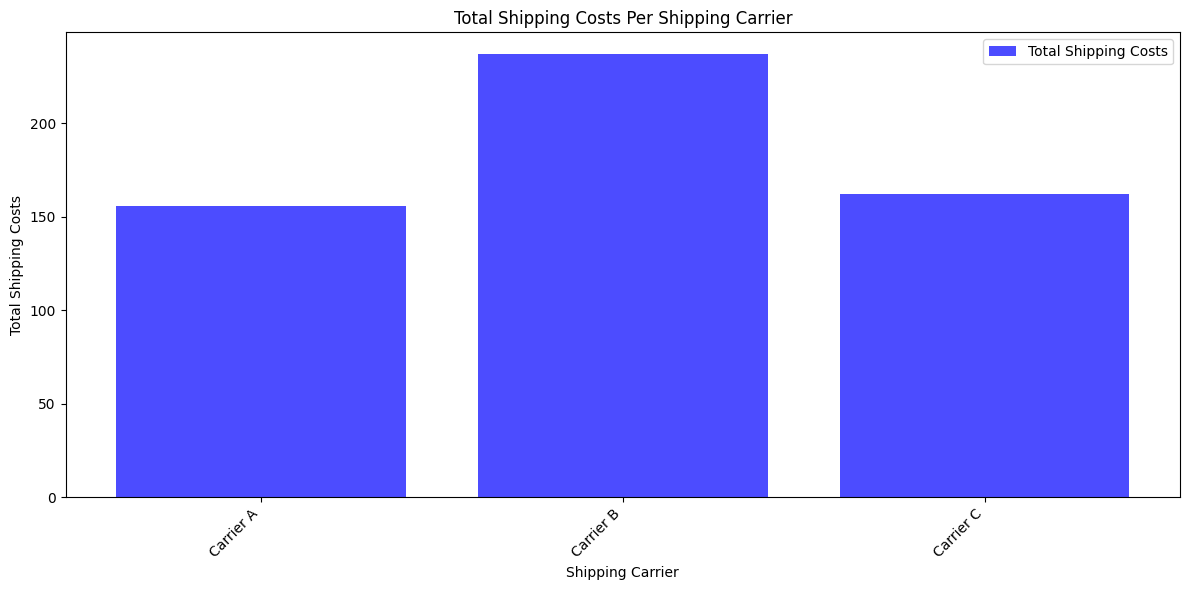

In [9]:
#Total Shipping Cost per Shipping Carrier

# Group by shipping carrier and calculate total shipping costs
carrier_costs = df.groupby('Shipping carriers').agg({
    'Shipping costs': 'sum'
}).reset_index()

# Plot total shipping costs per shipping carrier
plt.figure(figsize=(12, 6))
plt.bar(carrier_costs['Shipping carriers'], carrier_costs['Shipping costs'], color='b', alpha=0.7, label='Total Shipping Costs')

plt.xlabel('Shipping Carrier')
plt.ylabel('Total Shipping Costs')
plt.title('Total Shipping Costs Per Shipping Carrier')
plt.xticks(rotation=45, ha='right')  
plt.legend()

plt.tight_layout()
plt.show()


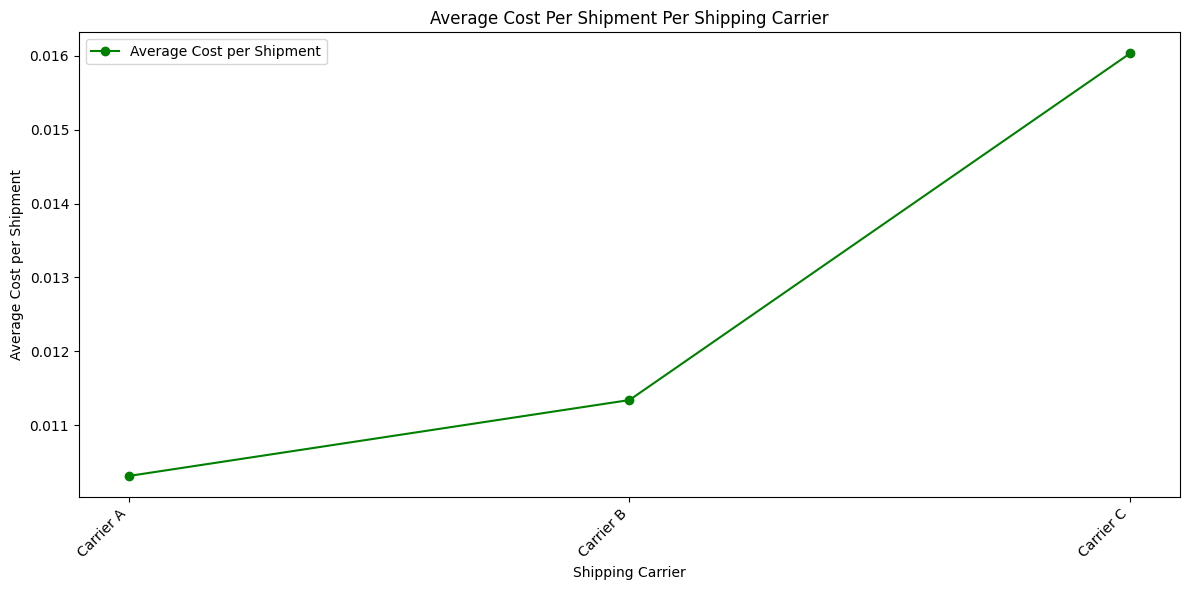

In [10]:
# Average cost per shipment per shipping carrier

# Group by shipping carrier to calculate total shipping costs and number of shipments
carrier_data = df.groupby('Shipping carriers').agg({
    'Shipping costs': 'sum',
    'Number of products sold': 'sum'  # Assuming this column represents shipments
}).reset_index()

# Calculate average cost per shipment
carrier_data['Average Cost per Shipment'] = carrier_data['Shipping costs'] / carrier_data['Number of products sold']

# Plot average cost per shipment per shipping carrier
plt.figure(figsize=(12, 6))
plt.plot(carrier_data['Shipping carriers'], carrier_data['Average Cost per Shipment'], color='g', marker='o', label='Average Cost per Shipment')

plt.xlabel('Shipping Carrier')
plt.ylabel('Average Cost per Shipment')
plt.title('Average Cost Per Shipment Per Shipping Carrier')
plt.xticks(rotation=45, ha='right')  # Rotate carrier names for cleaner graph
plt.legend()

plt.tight_layout()
plt.show()


In [11]:
# Shipping carrier's most dominant product type, quantity sold. transportatioon mode, and primary location

# Identify dominant product type, quantity, transportation mode, and location for each carrier
carrier_dominance = df.groupby('Shipping carriers').agg({
    'Product type': lambda x: x.mode()[0],  
    'Number of products sold': 'sum',  
    'Transportation modes': lambda x: x.mode()[0],  
    'Location': lambda x: x.mode()[0]  
}).reset_index()

# Rename columns for clarity
carrier_dominance.rename(columns={
    'Product type': 'Dominant Product Type',
    'Number of products sold': 'Total Quantity Sold',
    'Transportation modes': 'Dominant Transportation Mode',
    'Location': 'Primary Location'
}, inplace=True)

print(carrier_dominance)


  Shipping carriers Dominant Product Type  Total Quantity Sold  \
0         Carrier A              skincare                15081   
1         Carrier B              haircare                20889   
2         Carrier C              skincare                10129   

  Dominant Transportation Mode Primary Location  
0                         Road          Kolkata  
1                         Rail        Bangalore  
2                          Sea          Kolkata  


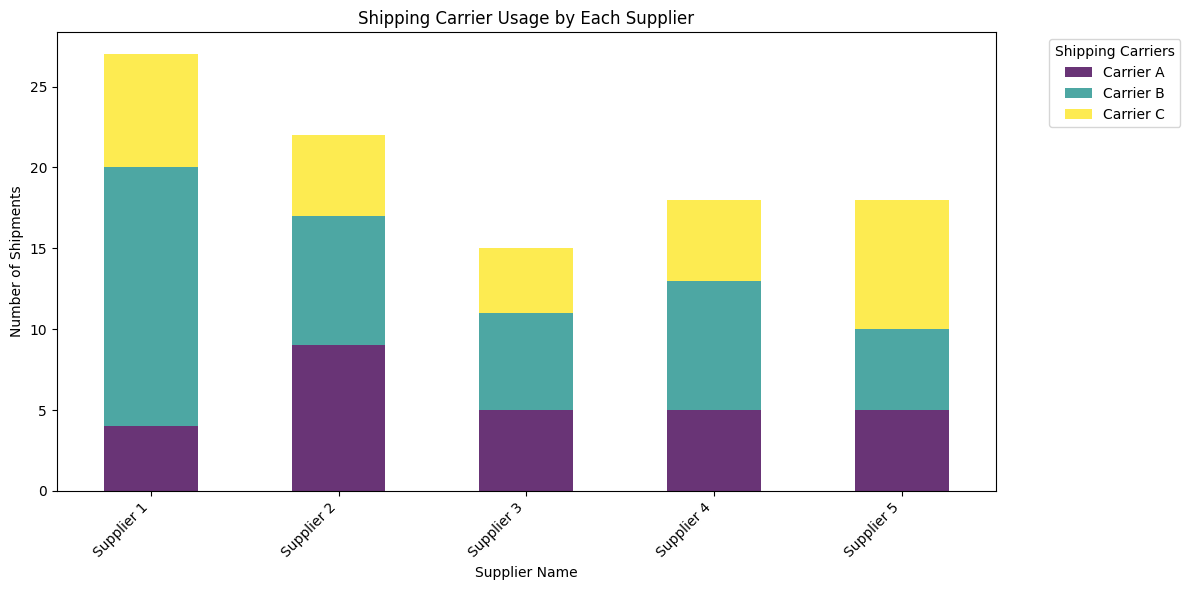

In [12]:
# Create a pivot table to calculate the count of shipping carrier usage per supplier
carrier_usage = df.pivot_table(
    index='Supplier name',
    columns='Shipping carriers',
    values='Number of products sold',
    aggfunc='count',
    fill_value=0
)

# Plot a stacked bar chart
carrier_usage.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='viridis',
    alpha=0.8
)


plt.title('Shipping Carrier Usage by Each Supplier')
plt.xlabel('Supplier Name')
plt.ylabel('Number of Shipments')
plt.xticks(rotation=45, ha='right')  # Rotate supplier names for readability
plt.legend(title='Shipping Carriers', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()



  Supplier name  Number of products sold  Order quantities  \
0    Supplier 1                    11080              1458   
1    Supplier 2                    11068              1022   
2    Supplier 3                     8083               632   
3    Supplier 4                     7206               842   
4    Supplier 5                     8662               968   

   Average Products per Shipment  
0                       7.599451  
1                      10.829746  
2                      12.789557  
3                       8.558195  
4                       8.948347  


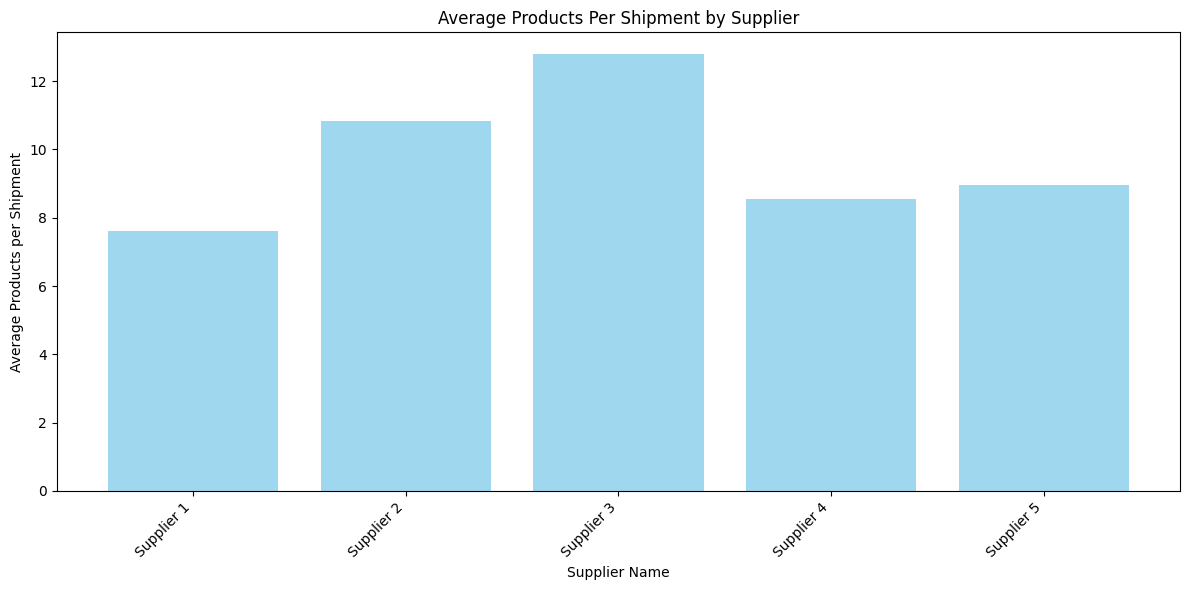

In [13]:
# Calculate average products per shipment for each supplier
average_products_per_shipment = df.groupby('Supplier name').agg({
    'Number of products sold': 'sum',  # Total products sold
    'Order quantities': 'sum'  # Total shipments
}).reset_index()

# Add a column for average products per shipment
average_products_per_shipment['Average Products per Shipment'] = (
    average_products_per_shipment['Number of products sold'] / average_products_per_shipment['Order quantities']
)


print(average_products_per_shipment)


plt.figure(figsize=(12, 6))
plt.bar(average_products_per_shipment['Supplier name'], 
        average_products_per_shipment['Average Products per Shipment'], 
        color='skyblue', alpha=0.8)


plt.xlabel('Supplier Name')
plt.ylabel('Average Products per Shipment')
plt.title('Average Products Per Shipment by Supplier')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [14]:
# Analysis over Supplier 1 Skincare soneumer habits


# Filter data for Supplier 1 and skincare products
supplier1_skincare = df[(df['Supplier name'] == 'Supplier 1') & (df['Product type'] == 'skincare')]

# Calculate metrics
average_units_per_shipment = supplier1_skincare['Order quantities'].mean()
average_cost_per_shipment = supplier1_skincare['Shipping costs'].mean()
shipping_routes_count = supplier1_skincare['Routes'].value_counts()
shipping_carriers_count = supplier1_skincare['Shipping carriers'].value_counts()

# Display calculated metrics
metrics = {
    "Average Units per Shipment": average_units_per_shipment,
    "Average Cost per Shipment": average_cost_per_shipment
}
metrics_df = pd.DataFrame(metrics, index=["Value"])

print("Supplier 1 Skincare Metrics")
display(metrics_df)


Supplier 1 Skincare Metrics


,Average Units per Shipment,Average Cost per Shipment
Value,55.466667,4.515346


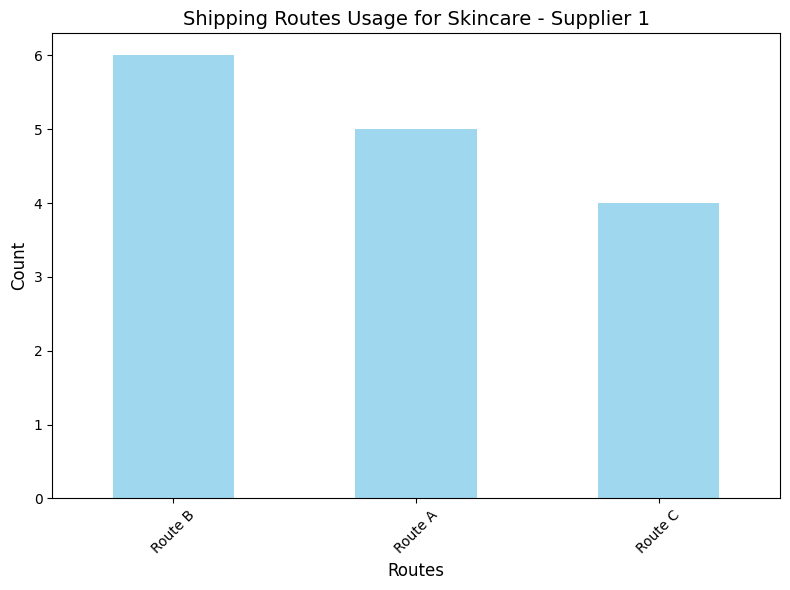

In [15]:
# Supplier 1 Skincare Route Usage

# Plot shipping routes usage
plt.figure(figsize=(8, 6))
shipping_routes_count.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title("Shipping Routes Usage for Skincare - Supplier 1", fontsize=14)
plt.xlabel("Routes", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


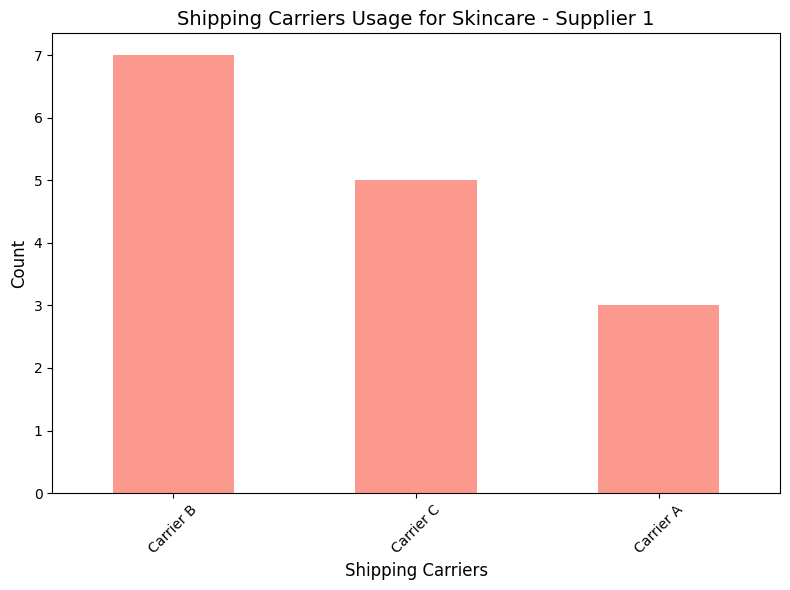

In [16]:
# Plot shipping carriers usage
plt.figure(figsize=(8, 6))
shipping_carriers_count.plot(kind='bar', color='salmon', alpha=0.8)
plt.title("Shipping Carriers Usage for Skincare - Supplier 1", fontsize=14)
plt.xlabel("Shipping Carriers", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


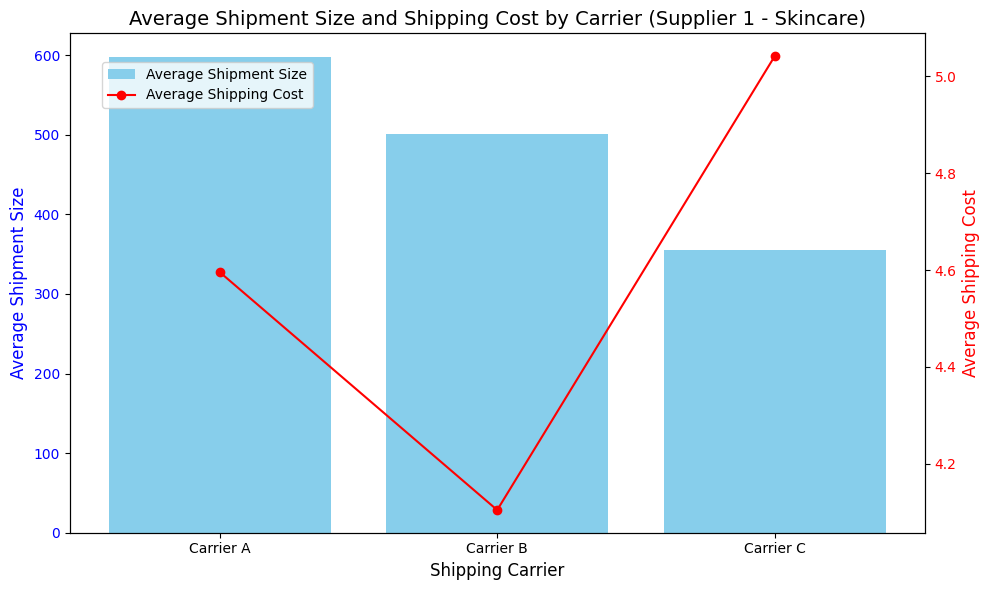

In [17]:
# Average shipment size and shipping cost for supplier 1 (skincare)

# Filter the data for Supplier 1 and skincare products
supplier_data = df[(df['Supplier name'] == 'Supplier 1') & (df['Product type'] == 'skincare')]

# Calculate the average shipment size and shipping cost per carrier
average_data = supplier_data.groupby('Shipping carriers').agg({
    'Number of products sold': 'mean',
    'Shipping costs': 'mean'
}).rename(columns={
    'Number of products sold': 'Average Shipment Size',
    'Shipping costs': 'Average Shipping Cost'
}).reset_index()

# Plot the average shipment size as bars
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(
    average_data['Shipping carriers'], 
    average_data['Average Shipment Size'], 
    color='skyblue',
    label='Average Shipment Size'
)
ax.set_xlabel("Shipping Carrier", fontsize=12)
ax.set_ylabel("Average Shipment Size", fontsize=12, color='blue')
ax.tick_params(axis='y', labelcolor='blue')
ax.set_title("Average Shipment Size and Shipping Cost by Carrier (Supplier 1 - Skincare)", fontsize=14)

# Create a secondary axis for average shipping cost
ax2 = ax.twinx()
ax2.plot(
    average_data['Shipping carriers'], 
    average_data['Average Shipping Cost'], 
    color='red',
    marker='o',
    label='Average Shipping Cost'
)
ax2.set_ylabel("Average Shipping Cost", fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.tight_layout()
plt.show()


Metrics for Supplier 1 (Cosmetics):
Average Units per Shipment: 55.86
Average Cost per Shipment: 7.24



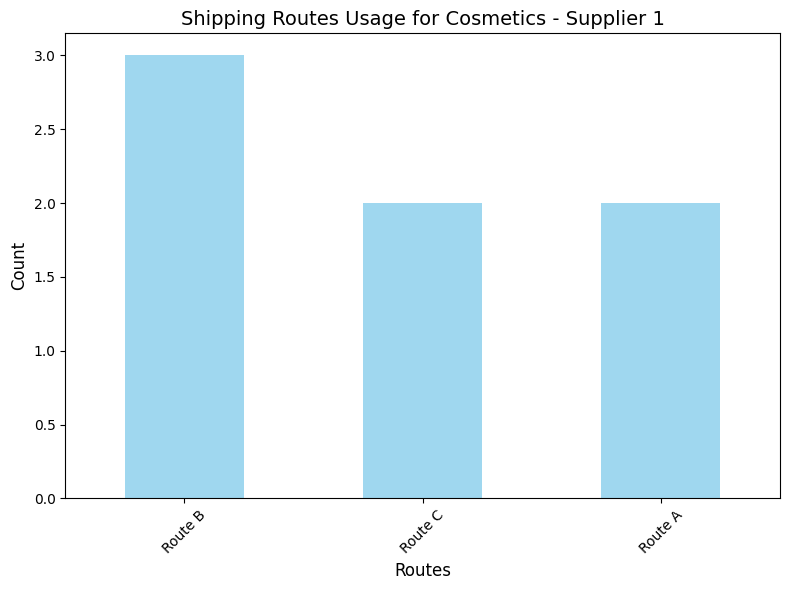

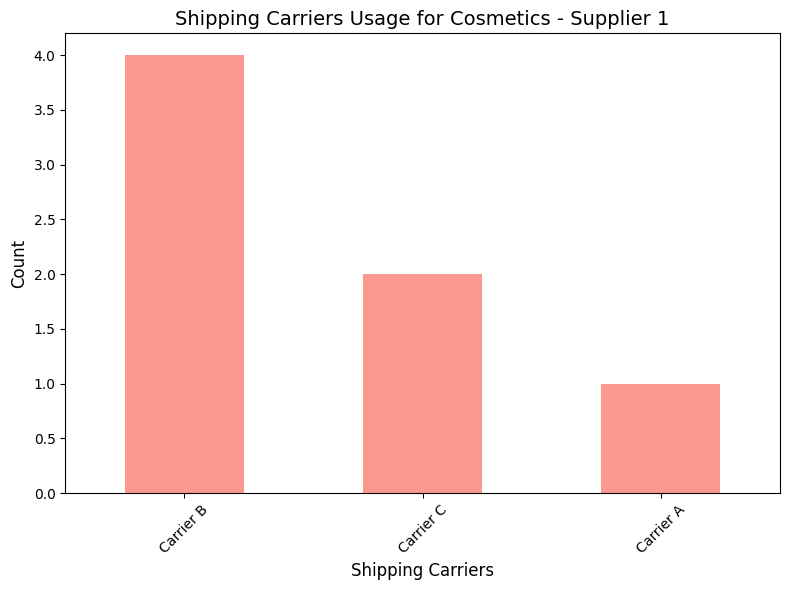

Shipment Size and Cost by Carrier for Supplier 1 (Cosmetics):
Shipping Carrier  Average Shipment Size  Average Shipping Cost
       Carrier A                   77.0               6.599614
       Carrier B                   36.0               8.805663
       Carrier C                   85.0               4.436804 



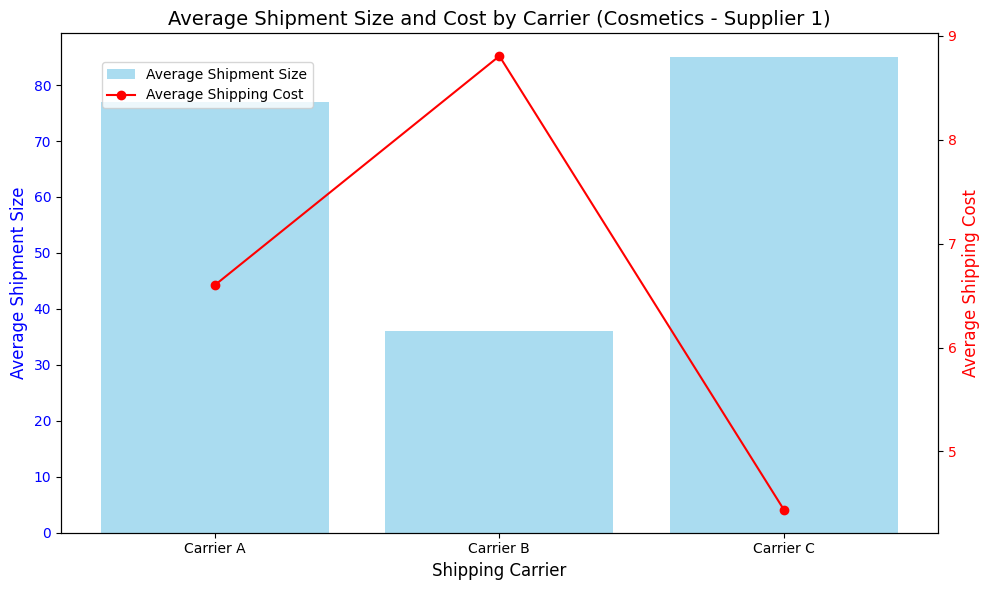

Metrics for Supplier 1 (Haircare):
Average Units per Shipment: 47.00
Average Cost per Shipment: 6.08



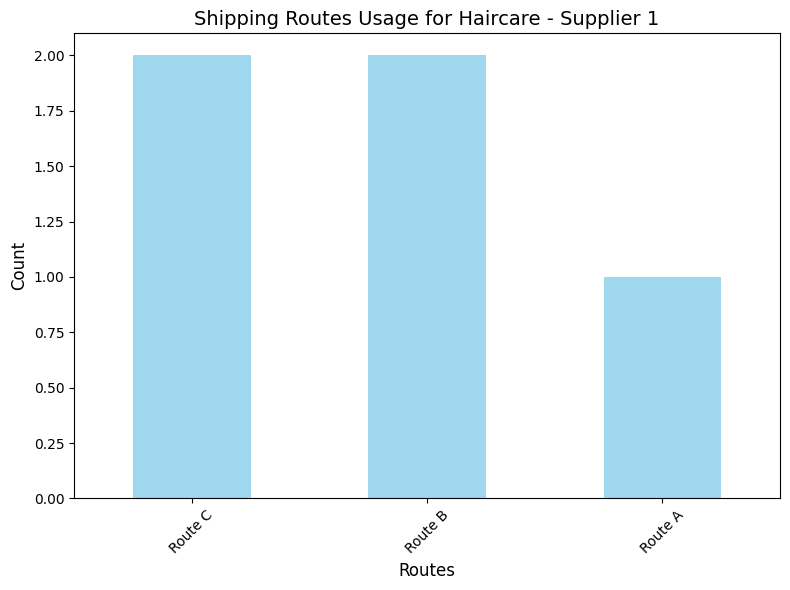

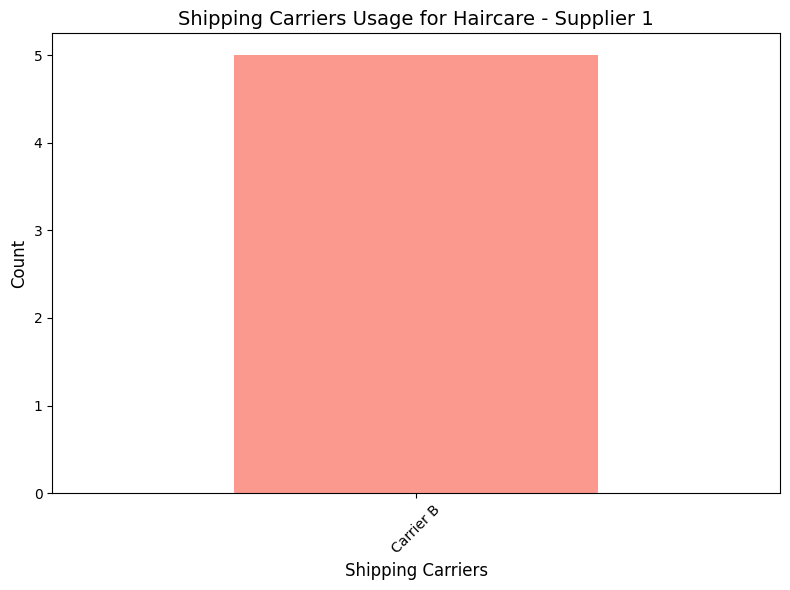

Shipment Size and Cost by Carrier for Supplier 1 (Haircare):
Shipping Carrier  Average Shipment Size  Average Shipping Cost
       Carrier B                   47.0               6.081217 



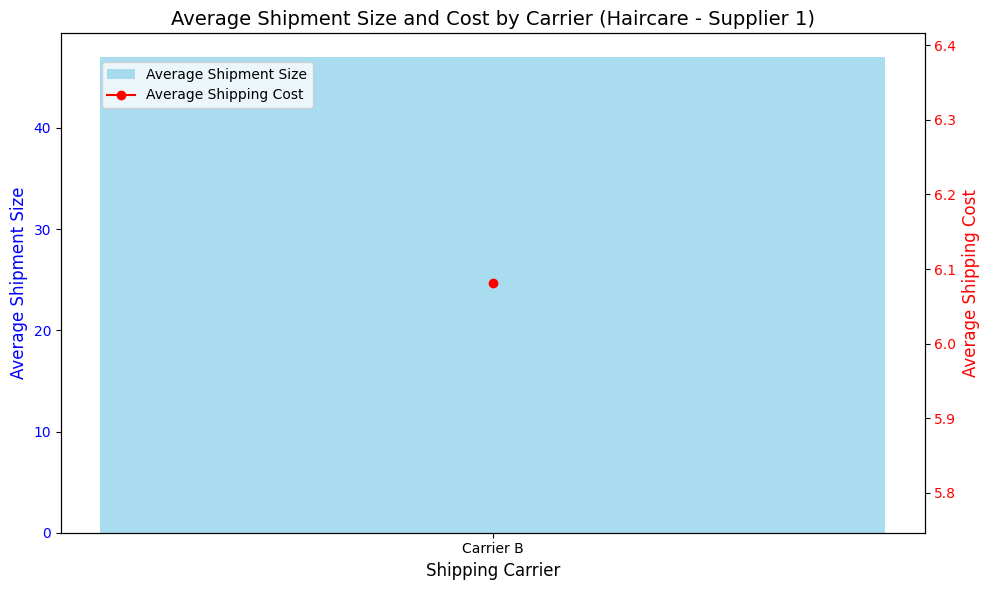

In [18]:
# Function to plot metrics for a given product category
def plot_metrics_for_category(category_name):
    # Filter data for Supplier 1 and the specified category
    supplier1_category = df[(df['Supplier name'] == 'Supplier 1') & (df['Product type'] == category_name)]
    
    # Calculate metrics
    average_units_per_shipment = supplier1_category['Order quantities'].mean()
    average_cost_per_shipment = supplier1_category['Shipping costs'].mean()
    shipping_routes_count = supplier1_category['Routes'].value_counts()
    shipping_carriers_count = supplier1_category['Shipping carriers'].value_counts()
    
    # Print metrics
    print(f"Metrics for Supplier 1 ({category_name.capitalize()}):")
    print(f"Average Units per Shipment: {average_units_per_shipment:.2f}")
    print(f"Average Cost per Shipment: {average_cost_per_shipment:.2f}\n")
    
    # Plot shipping routes usage
    plt.figure(figsize=(8, 6))
    shipping_routes_count.plot(kind='bar', color='skyblue', alpha=0.8)
    plt.title(f"Shipping Routes Usage for {category_name.capitalize()} - Supplier 1", fontsize=14)
    plt.xlabel("Routes", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot shipping carriers usage
    plt.figure(figsize=(8, 6))
    shipping_carriers_count.plot(kind='bar', color='salmon', alpha=0.8)
    plt.title(f"Shipping Carriers Usage for {category_name.capitalize()} - Supplier 1", fontsize=14)
    plt.xlabel("Shipping Carriers", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Shipment size and average cost per carrier
    shipment_and_price_by_carrier = supplier1_category.groupby('Shipping carriers').agg({
        'Order quantities': 'mean',
        'Shipping costs': 'mean'
    }).reset_index()
    shipment_and_price_by_carrier.columns = ['Shipping Carrier', 'Average Shipment Size', 'Average Shipping Cost']

    # Print shipment size and cost
    print(f"Shipment Size and Cost by Carrier for Supplier 1 ({category_name.capitalize()}):")
    print(shipment_and_price_by_carrier.to_string(index=False), "\n")

    # Plot shipment size and shipping cost
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax1.bar(
        shipment_and_price_by_carrier['Shipping Carrier'],
        shipment_and_price_by_carrier['Average Shipment Size'],
        color='skyblue',
        alpha=0.7,
        label='Average Shipment Size'
    )
    ax1.set_xlabel("Shipping Carrier", fontsize=12)
    ax1.set_ylabel("Average Shipment Size", fontsize=12, color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_title(f"Average Shipment Size and Cost by Carrier ({category_name.capitalize()} - Supplier 1)", fontsize=14)

    ax2 = ax1.twinx()
    ax2.plot(
        shipment_and_price_by_carrier['Shipping Carrier'],
        shipment_and_price_by_carrier['Average Shipping Cost'],
        color='red',
        marker='o',
        label='Average Shipping Cost'
    )
    ax2.set_ylabel("Average Shipping Cost", fontsize=12, color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
    plt.tight_layout()
    plt.show()

# Plot for cosmetics
plot_metrics_for_category('cosmetics')

# Plot for haircare
plot_metrics_for_category('haircare')


In [19]:
# Create a Plotly interactive dashboard for all three products

# Filter data for Supplier 1
supplier1_data = df[df['Supplier name'] == 'Supplier 1']

# Initialize Dash app
app = Dash(__name__)

# Define categories for dropdown
dropdown_categories = ['skincare', 'haircare', 'cosmetics']

# App layout
app.layout = html.Div([
    html.H1("Supplier 1 Dashboard", style={'textAlign': 'center'}),
    dcc.Dropdown(
        id='category-dropdown',
        options=[{'label': cat.capitalize(), 'value': cat} for cat in dropdown_categories],
        value='skincare',
        style={'width': '50%', 'margin': 'auto'}
    ),
    html.Div([
        dcc.Graph(id='routes-bar-chart'),
        dcc.Graph(id='carriers-bar-chart'),
        dcc.Graph(id='shipment-size-cost-chart')
    ])
])

# Callback to update graphs based on selected category
@app.callback(
    [
        Output('routes-bar-chart', 'figure'),
        Output('carriers-bar-chart', 'figure'),
        Output('shipment-size-cost-chart', 'figure')
    ],
    [Input('category-dropdown', 'value')]
)
def update_graphs(category):
    category_data = supplier1_data[supplier1_data['Product type'] == category]

    # Shipping Routes Bar Chart
    routes_count = category_data['Routes'].value_counts().reset_index()
    routes_count.columns = ['Routes', 'Count']
    routes_fig = px.bar(routes_count, x='Routes', y='Count', title=f"Shipping Routes Usage ({category.capitalize()})")

    # Shipping Carriers Bar Chart
    carriers_count = category_data['Shipping carriers'].value_counts().reset_index()
    carriers_count.columns = ['Shipping Carrier', 'Count']
    carriers_fig = px.bar(carriers_count, x='Shipping Carrier', y='Count', title=f"Shipping Carriers Usage ({category.capitalize()})")

    # Shipment Size and Cost Chart
    shipment_and_cost = category_data.groupby('Shipping carriers').agg({
        'Order quantities': 'mean',
        'Shipping costs': 'mean'
    }).reset_index()
    shipment_and_cost.columns = ['Shipping Carrier', 'Average Shipment Size', 'Average Shipping Cost']

    # Align scales for better visualization
    max_shipping_cost = shipment_and_cost['Average Shipping Cost'].max()
    shipment_and_cost['Scaled Shipping Cost'] = shipment_and_cost['Average Shipping Cost'] / max_shipping_cost * 100

    shipment_cost_fig = go.Figure()
    shipment_cost_fig.add_trace(
        go.Bar(
            x=shipment_and_cost['Shipping Carrier'],
            y=shipment_and_cost['Average Shipment Size'],
            name='Average Shipment Size',
            marker_color='skyblue'
        )
    )
    shipment_cost_fig.add_trace(
        go.Scatter(
            x=shipment_and_cost['Shipping Carrier'],
            y=shipment_and_cost['Scaled Shipping Cost'],
            name='Average Shipping Cost (Scaled)',
            mode='lines+markers',
            marker_color='red',
            yaxis='y2'
        )
    )
    shipment_cost_fig.update_layout(
        title=f"Average Shipment Size and Cost by Carrier ({category.capitalize()})",
        xaxis_title="Shipping Carrier",
        yaxis_title="Average Shipment Size",
        yaxis2=dict(
            title="Average Shipping Cost",
            overlaying="y",
            side="right",
            tickvals=[value for value in range(0, 101, 20)],
            ticktext=[f"{value:.2f}" for value in (max_shipping_cost * range(0, 101, 20) / 100)]
        ),
        legend_title="Metrics",
        barmode='group'
    )

    return routes_fig, carriers_fig, shipment_cost_fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
